In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!dir | findstr -i housing.csv

11/06/2023  09:42 PM         1,423,529 housing.csv


In [3]:
housing =pd.read_csv("housing.csv") #reading csv file
housing.head(5) #to display first five row

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info() # first investigate data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
#missing value in total_bedroom-207 VALUES MISSING

In [6]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
#5 categories


In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


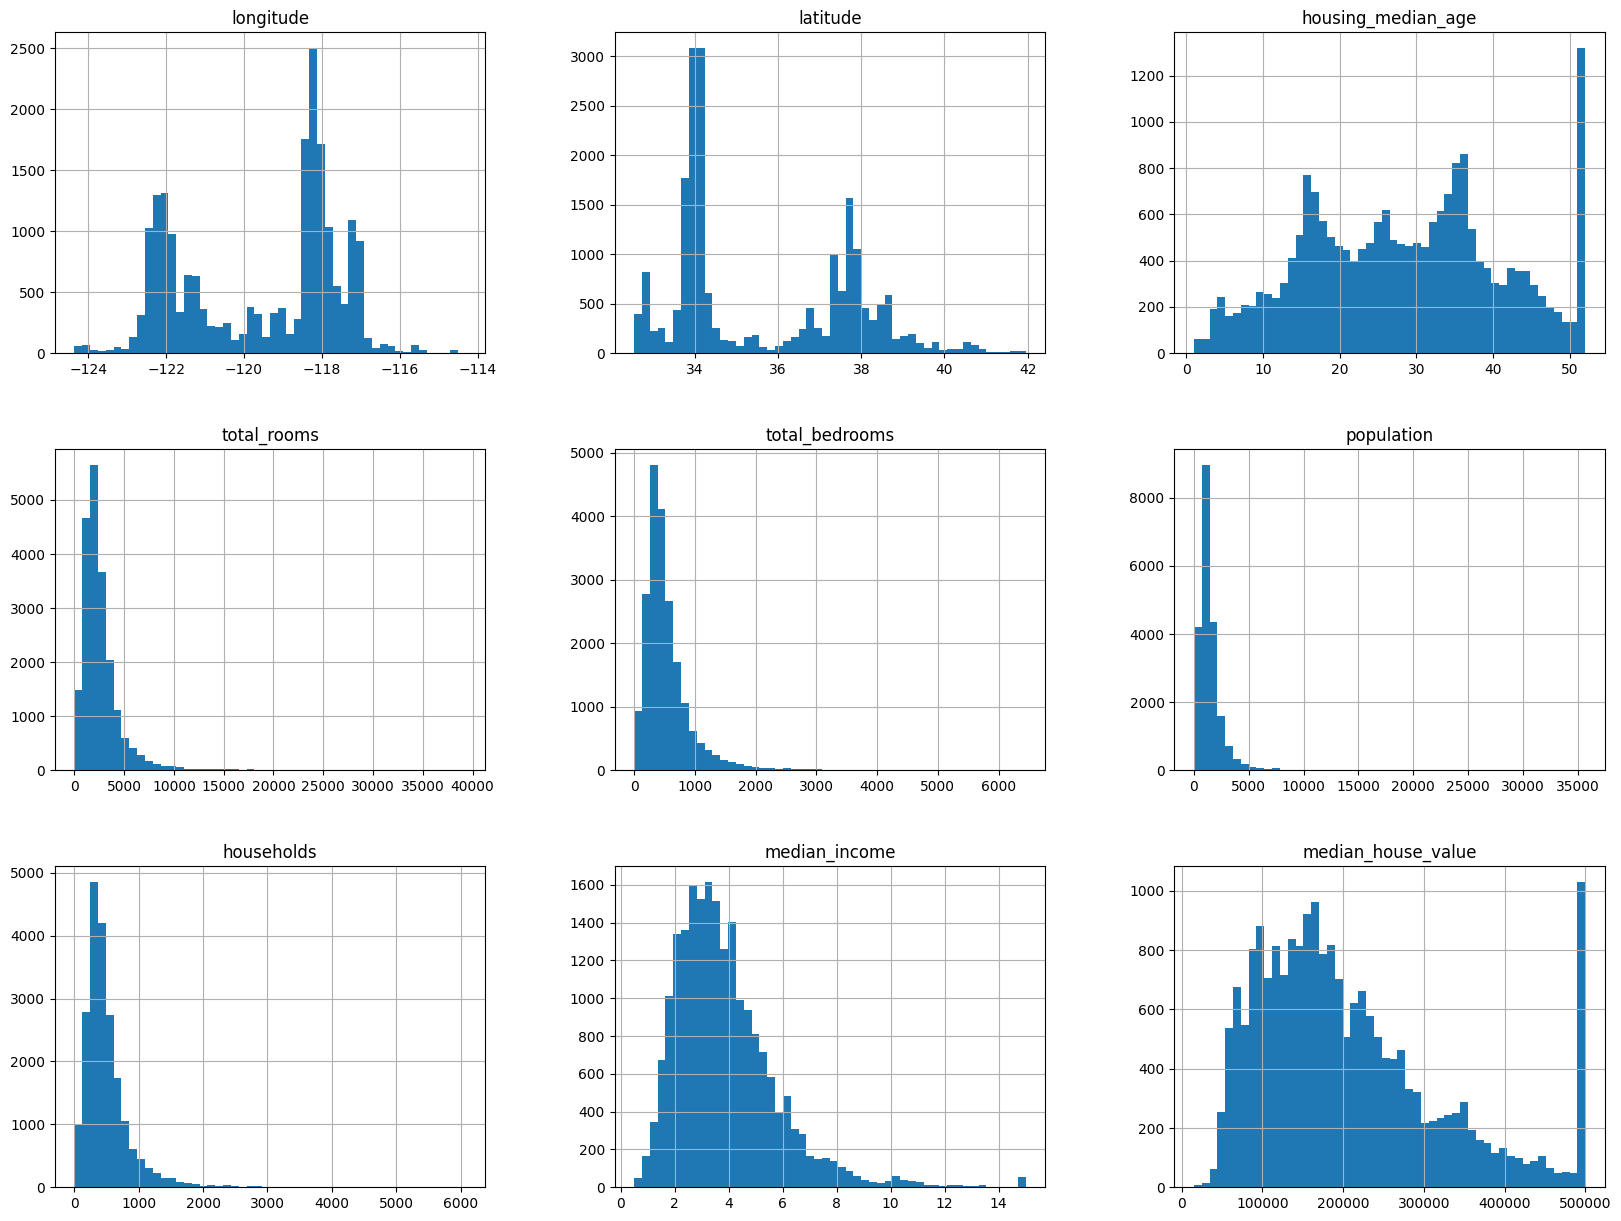

In [9]:
housing.hist(bins=50, figsize=(20,15)) #trying to fit dataset in bin (20640%50=412 data in one bar)
plt.show()

<Axes: >

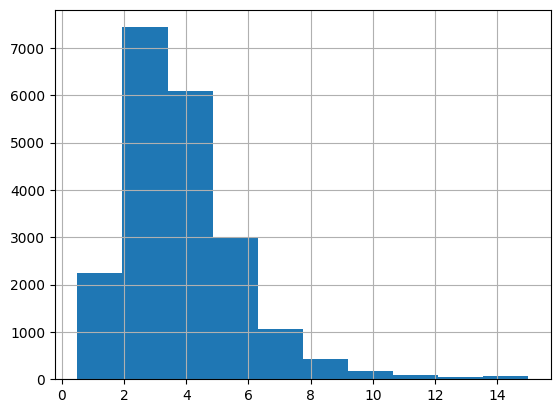

In [10]:
#median income looks important feature

housing['median_income'].hist()

In [11]:
#dividing the income category to limit number in median_income
housing['income_cat']=np.ceil(housing['median_income']/1.5)
#putting the income category in data dataset
housing['income_cat'].where(housing['income_cat']<5,other=5.0,inplace=True)


In [12]:
housing['income_cat']

0        5.0
1        5.0
2        5.0
3        4.0
4        3.0
        ... 
20635    2.0
20636    2.0
20637    2.0
20638    2.0
20639    2.0
Name: income_cat, Length: 20640, dtype: float64

In [13]:
housing.tail(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2.0
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND,2.0


In [14]:
#spliting dataset into trainset,testtest - stratified sampling based on the income category
from sklearn.model_selection import StratifiedShuffleSplit
#dividing data=20% to test set and 80% train data
#to ensure that the test set is representative of the various categories of incomes in the whole datase
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in split.split(housing,housing['income_cat']):
        strat_train_set = housing.loc[train_index]
        strat_test_set = housing.loc[test_index]

In [15]:
 len(strat_train_set)


16512

In [16]:
len(strat_test_set)

4128

In [17]:
len(housing)==(len(strat_train_set)+len(strat_test_set))

True

In [18]:
housing['income_cat'].value_counts()

income_cat
3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: count, dtype: int64

In [19]:
housing['income_cat'].value_counts()/len(housing) #% in each category

income_cat
3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: count, dtype: float64

In [20]:
#making sure in test set(e income categoryproportions in the test set)
strat_test_set['income_cat'].value_counts()/len(strat_test_set)
#the test set generated using stratified sampling has income category proportions almost identical to those in the full dataset

income_cat
3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114341
1.0    0.039971
Name: count, dtype: float64

In [21]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
2572,-124.15,40.78,36.0,2112.0,374.0,829.0,368.0,3.3984,90000.0,NEAR OCEAN,3.0
19298,-122.80,38.39,26.0,2273.0,474.0,1124.0,420.0,2.9453,166700.0,<1H OCEAN,2.0
11018,-117.80,33.77,29.0,5436.0,707.0,2046.0,685.0,8.7496,349500.0,<1H OCEAN,5.0
20392,-118.87,34.23,14.0,4242.0,746.0,1858.0,689.0,6.0145,287100.0,<1H OCEAN,5.0
19994,-119.37,36.19,24.0,1306.0,266.0,889.0,276.0,2.4922,66100.0,INLAND,2.0
...,...,...,...,...,...,...,...,...,...,...,...
19645,-120.72,37.54,17.0,729.0,134.0,431.0,121.0,4.2188,131300.0,INLAND,3.0
5076,-118.32,33.98,49.0,1993.0,446.0,1052.0,394.0,2.2138,119800.0,<1H OCEAN,2.0
5798,-118.24,34.13,37.0,1644.0,395.0,959.0,383.0,3.3636,257700.0,<1H OCEAN,3.0
20030,-119.03,36.08,19.0,2471.0,431.0,1040.0,426.0,3.2500,80600.0,INLAND,3.0


In [22]:
for items in (strat_train_set,strat_test_set) :
    items.drop("income_cat", axis=1, inplace=True)

In [23]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2572,-124.15,40.78,36.0,2112.0,374.0,829.0,368.0,3.3984,90000.0,NEAR OCEAN
19298,-122.80,38.39,26.0,2273.0,474.0,1124.0,420.0,2.9453,166700.0,<1H OCEAN
11018,-117.80,33.77,29.0,5436.0,707.0,2046.0,685.0,8.7496,349500.0,<1H OCEAN
20392,-118.87,34.23,14.0,4242.0,746.0,1858.0,689.0,6.0145,287100.0,<1H OCEAN
19994,-119.37,36.19,24.0,1306.0,266.0,889.0,276.0,2.4922,66100.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
19645,-120.72,37.54,17.0,729.0,134.0,431.0,121.0,4.2188,131300.0,INLAND
5076,-118.32,33.98,49.0,1993.0,446.0,1052.0,394.0,2.2138,119800.0,<1H OCEAN
5798,-118.24,34.13,37.0,1644.0,395.0,959.0,383.0,3.3636,257700.0,<1H OCEAN
20030,-119.03,36.08,19.0,2471.0,431.0,1040.0,426.0,3.2500,80600.0,INLAND


In [24]:
#Visualize the Data
housing=strat_train_set.copy()

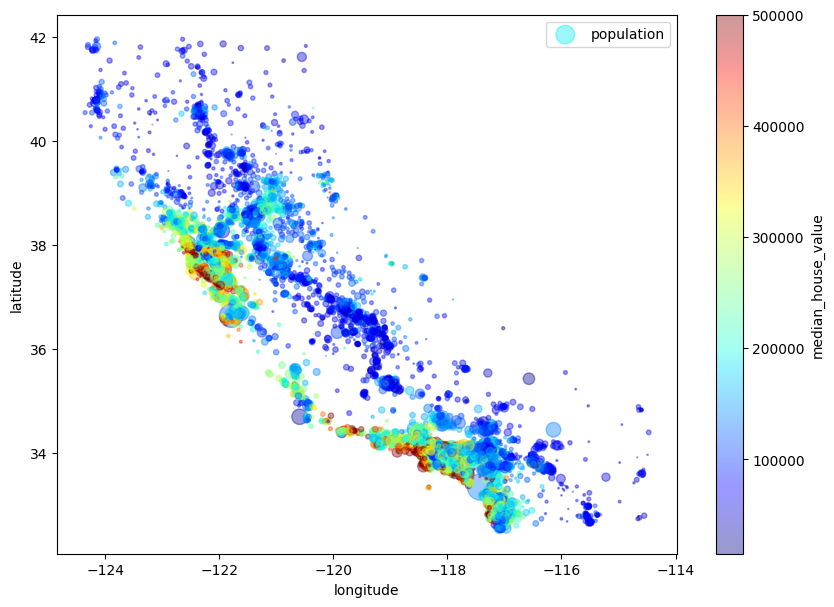

In [25]:

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [26]:
#looking for correlation
corr_matrix = housing[housing.columns.drop('ocean_proximity')]
corr_matrix = corr_matrix.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688988
total_rooms           0.137430
housing_median_age    0.107227
households            0.069089
total_bedrooms        0.053455
population           -0.023882
longitude            -0.042943
latitude             -0.145757
Name: median_house_value, dtype: float64

In [27]:
import sklearn
print(sklearn.__version__)

1.3.2


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

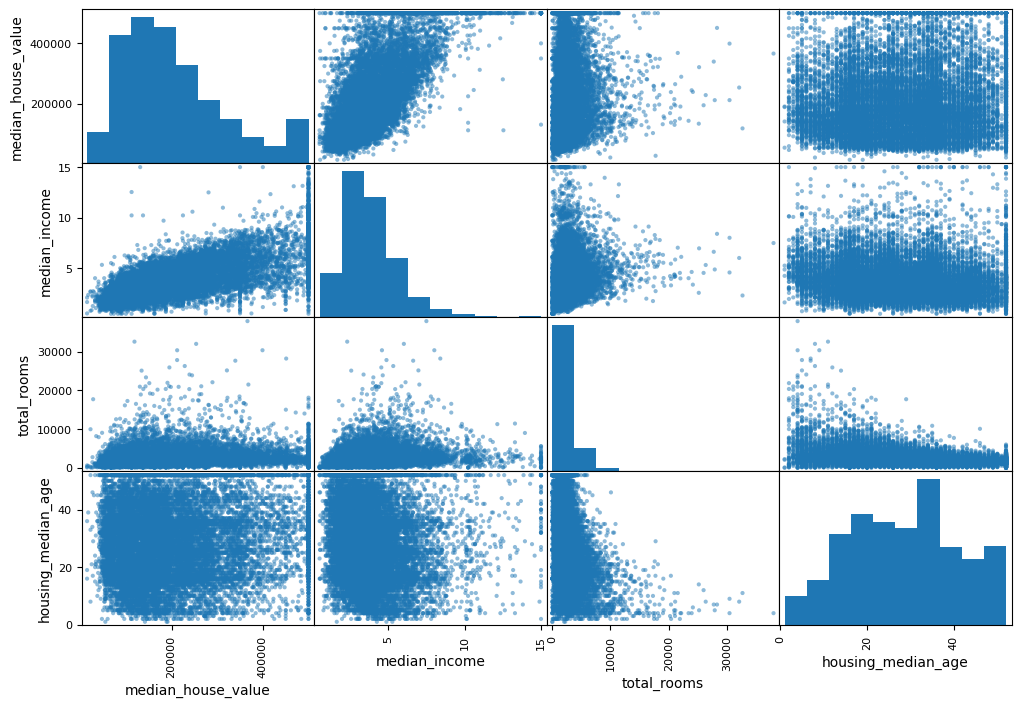

In [28]:
#plots every numerical attribute against every other numerical attribute. Since there are now 11 numerical attributes, you would get
#(11)^2 = 121 plots but here we pick important feature
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

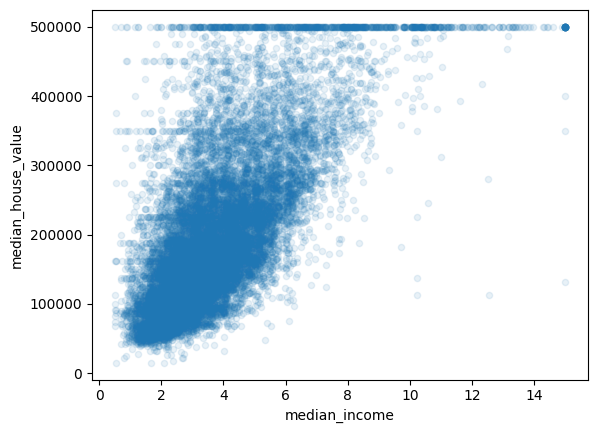

In [29]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
 alpha=0.1)


In [30]:
#This plot reveals a few things. First, the correlation is indeed very strong; you can
#clearly see the upward trend, and the points are not too dispersed.

In [31]:
#customised features
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
19328,-122.87,38.48,27.0,3894.0,776.0,1832.0,715.0,3.5085,187800.0,<1H OCEAN,5.446154,0.199281,2.562238
4806,-118.34,34.02,49.0,1609.0,371.0,896.0,389.0,2.5156,136600.0,<1H OCEAN,4.136247,0.230578,2.303342
15645,-122.42,37.79,52.0,3364.0,1100.0,2112.0,1045.0,2.1343,400000.0,NEAR BAY,3.219139,0.326992,2.021053
2975,-119.08,35.32,8.0,11609.0,2141.0,5696.0,2100.0,5.0012,106300.0,INLAND,5.528095,0.184426,2.712381
18823,-121.62,41.78,40.0,3272.0,663.0,1467.0,553.0,1.7885,43500.0,INLAND,5.916817,0.202628,2.652803
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12239,-116.93,33.73,13.0,3603.0,573.0,1644.0,515.0,4.0433,132300.0,INLAND,6.996117,0.159034,3.192233
12181,-117.27,33.77,16.0,2876.0,576.0,1859.0,545.0,2.0878,101300.0,<1H OCEAN,5.277064,0.200278,3.411009
18041,-121.98,37.22,46.0,10088.0,1910.0,3728.0,1781.0,5.2321,500001.0,<1H OCEAN,5.664234,0.189334,2.093206
7915,-118.08,33.88,26.0,1507.0,270.0,931.0,275.0,5.1645,244900.0,<1H OCEAN,5.480000,0.179164,3.385455


In [32]:


corr_matrix = housing[housing.columns.drop('ocean_proximity')]
corr_matrix = corr_matrix.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688988
rooms_per_household         0.157680
total_rooms                 0.137430
housing_median_age          0.107227
households                  0.069089
total_bedrooms              0.053455
population                 -0.023882
population_per_household   -0.026893
longitude                  -0.042943
latitude                   -0.145757
bedrooms_per_room          -0.255922
Name: median_house_value, dtype: float64

In [33]:
#bedrooms_per_room attribute is much more correlated with the median house value than the total number of rooms or bedroom
#houses with a lower bedroom/room ratio tend to be more expensive

In [34]:
#housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value", alpha=0.2)
#plt.axis([0,5,0,5500000])
#plt.show()

In [35]:
#preaping data for machine learning model
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()


In [36]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 19328 to 8123
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [37]:
#fill the missing value in total_bedrooms by median value
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [38]:
housing_num.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
19328,-122.87,38.48,27.0,3894.0,776.0,1832.0,715.0,3.5085
4806,-118.34,34.02,49.0,1609.0,371.0,896.0,389.0,2.5156
15645,-122.42,37.79,52.0,3364.0,1100.0,2112.0,1045.0,2.1343
2975,-119.08,35.32,8.0,11609.0,2141.0,5696.0,2100.0,5.0012
18823,-121.62,41.78,40.0,3272.0,663.0,1467.0,553.0,1.7885


In [39]:
imputer.statistics_

array([-118.49  ,   34.25  ,   29.    , 2129.    ,  436.    , 1167.    ,
        410.    ,    3.5343])

In [40]:
housing_num.median().values

array([-118.49  ,   34.25  ,   29.    , 2129.    ,  436.    , 1167.    ,
        410.    ,    3.5343])

In [41]:
#use this “trained” imputer to transform the training set by replacing missing values with the learned medians
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
 index=housing_num.index)

In [42]:
#cross_checking if null value still present
housing_tr[housing_tr.isnull().any(axis=1)].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income


In [43]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 19328 to 8123
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [44]:
#handling categorical values
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)



,ocean_proximity
19328,<1H OCEAN
4806,<1H OCEAN
15645,NEAR BAY
2975,INLAND
18823,INLAND
6697,<1H OCEAN
16825,NEAR OCEAN
1485,NEAR BAY
7312,<1H OCEAN
6698,<1H OCEAN


In [45]:
#pandas method to convert them to categorical features
#from pandas import factorize
#housing_cat_encoded,housing_categories=housing_cat.factorize()

housing_cat_encoded,housing_categories=pd.factorize(housing_cat["ocean_proximity"])

In [46]:
housing_cat_encoded[:10]

array([0, 0, 1, 2, 2, 0, 3, 1, 0, 0], dtype=int64)

In [47]:
housing_categories

Index(['<1H OCEAN', 'NEAR BAY', 'INLAND', 'NEAR OCEAN', 'ISLAND'], dtype='object')

In [48]:
np.unique(housing_cat_encoded)

array([0, 1, 2, 3, 4], dtype=int64)

In [49]:
#Scikit-Learn provides a OneHotEncoder class to convert categorical values into one-hot vectors
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [50]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [51]:
cat_encoder.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [52]:
#####customer transformation

In [53]:
from sklearn.base import BaseEstimator, TransformerMixin

In [54]:
from sklearn.base import BaseEstimator, TransformerMixin
#column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
     def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
         self.add_bedrooms_per_room = add_bedrooms_per_room
     def fit(self, X, y=None):
         return self # nothing else to do
     def transform(self, X):
         rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
         population_per_household = X[:, population_ix] / X[:, households_ix]
         if self.add_bedrooms_per_room:
             bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
             return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
         else:
             return np.c_[X, rooms_per_household, population_per_household]


In [55]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs=pd.DataFrame(housing_extra_attribs,columns=list(housing.columns)+["rooms_per_household","population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-122.87,38.48,27.0,3894.0,776.0,1832.0,715.0,3.5085,<1H OCEAN,5.446154,2.562238
1,-118.34,34.02,49.0,1609.0,371.0,896.0,389.0,2.5156,<1H OCEAN,4.136247,2.303342
2,-122.42,37.79,52.0,3364.0,1100.0,2112.0,1045.0,2.1343,NEAR BAY,3.219139,2.021053
3,-119.08,35.32,8.0,11609.0,2141.0,5696.0,2100.0,5.0012,INLAND,5.528095,2.712381
4,-121.62,41.78,40.0,3272.0,663.0,1467.0,553.0,1.7885,INLAND,5.916817,2.652803


In [56]:
##setting up pipeline for all preproccessing of numerical attribute
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('attribs_adder', CombinedAttributesAdder()),
 ('std_scaler', StandardScaler()),
 ])
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-1.65044886,  1.3366276 , -0.12821464, ...,  0.0083221 ,
        -0.04696513, -0.2292273 ],
       [ 0.6101325 , -0.7499318 ,  1.62466495, ..., -0.53552899,
        -0.07066637,  0.26508551],
       [-1.4258878 ,  1.01381909,  1.86369398, ..., -0.91629663,
        -0.09650921,  1.78786516],
       ...,
       [-1.20631698,  0.74715118,  1.38563591, ...,  0.09886509,
        -0.08990375, -0.3863338 ],
       [ 0.7398789 , -0.81542918, -0.20789099, ...,  0.02237445,
         0.02839822, -0.54696048],
       [ 0.68997644, -0.85285626,  0.11081439, ..., -0.61012165,
         0.10943301,  1.00222509]])

In [57]:
#complete pipeline
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ("cat", OneHotEncoder(), cat_attribs),
 ])
housing_prepared = full_pipeline.fit_transform(housing)

housing_prepared

array([[-1.65044886,  1.3366276 , -0.12821464, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.6101325 , -0.7499318 ,  1.62466495, ...,  0.        ,
         0.        ,  0.        ],
       [-1.4258878 ,  1.01381909,  1.86369398, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.20631698,  0.74715118,  1.38563591, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.7398789 , -0.81542918, -0.20789099, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.68997644, -0.85285626,  0.11081439, ...,  0.        ,
         0.        ,  1.        ]])

In [58]:
##model

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)


LinearRegression()

In [59]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))


Predictions: [227885.17864683 199641.86684096 250266.3411042  236655.89283764
  11125.78759881]
Labels: [187800.0, 136600.0, 400000.0, 106300.0, 43500.0]


In [60]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68286.41923036716

In [61]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)


DecisionTreeRegressor()

In [62]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse


0.0

In [63]:
# the model has badly overfit the data.
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([69772.74500342, 72592.19832592, 72035.91826622, 70061.33981076,
       72320.86289402, 73287.57767253, 68623.43415954, 68824.48795052,
       71965.76273966, 70469.94094321])

In [64]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [65]:
display_scores(tree_rmse_scores)




Scores: [69772.74500342 72592.19832592 72035.91826622 70061.33981076
 72320.86289402 73287.57767253 68623.43415954 68824.48795052
 71965.76273966 70469.94094321]
Mean: 70995.42677658131
Standard deviation: 1567.402926315868


In [66]:
#linearregression
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)



Scores: [65993.97246676 69010.24806374 71413.83112493 68742.95840851
 68937.97597951 66882.38169636 68302.97258028 66747.85112588
 69786.49966527 69063.19231501]
Mean: 68488.18834262603
Standard deviation: 1515.8560925367474


In [67]:
 from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)


RandomForestRegressor()

In [68]:
housing_pred = forest_reg.predict(housing_prepared)
housing_pred

array([188327.  , 151984.  , 373425.03, ..., 469797.74, 234054.  ,
       126561.  ])

In [71]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [47261.40052256 52213.74788916 50710.15674685 50253.20883628
 51922.23120528 47475.75076841 50422.23934926 49517.39298401
 51808.69206946 50362.28105807]
Mean: 50194.71014293499
Standard deviation: 1626.9769787459072


In [70]:
1+1

2

In [ ]:
##coorelation
